<a href="https://colab.research.google.com/github/fireHedgehog/music-intrument-OvA-model/blob/main/open-mic/open_mic_result_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
file_path = '/content/open-mic-result-compare.txt'  # Update this path as needed

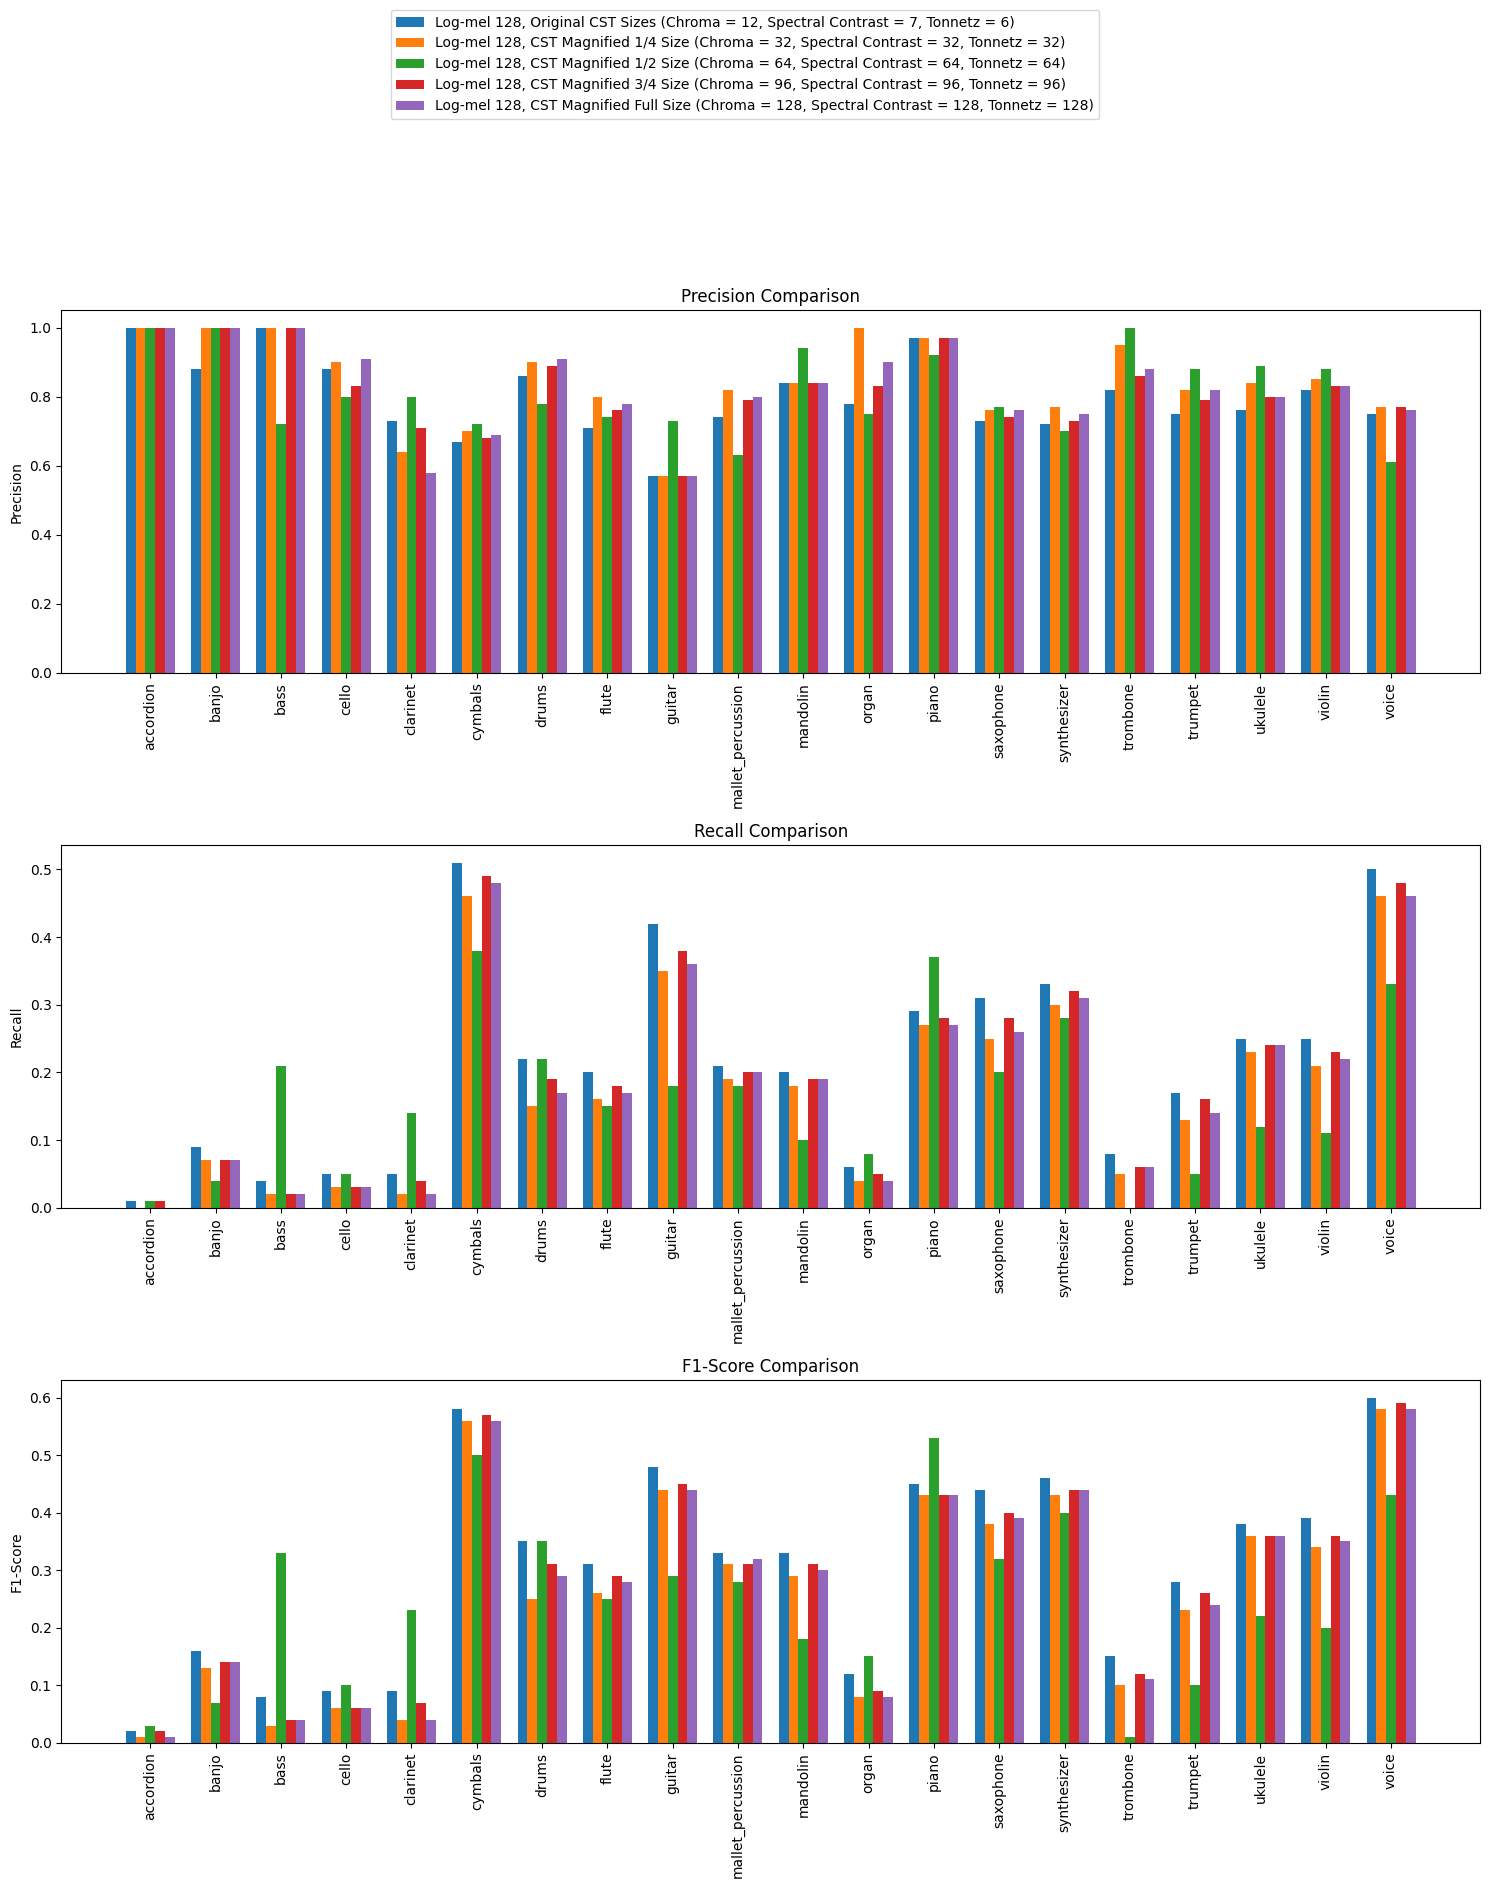

In [11]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_results(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    combinations = {}
    current_combination = None

    for line in lines:
        if 'size of log-mel' in line or re.match(r'^\s*\d+/\d+ of size of log-mel', line):
            current_combination = line.strip()
            combinations[current_combination] = []
        elif current_combination and re.match(r'^\s*\w', line):
            combinations[current_combination].append(line.strip())

    data = {}
    for comb, metrics in combinations.items():
        instruments = []
        precision = []
        recall = []
        f1_score = []
        for metric in metrics:
            if metric.startswith(('accordion', 'banjo', 'bass', 'cello', 'clarinet', 'cymbals', 'drums', 'flute', 'guitar', 'mallet_percussion', 'mandolin', 'organ', 'piano', 'saxophone', 'synthesizer', 'trombone', 'trumpet', 'ukulele', 'violin', 'voice')):
                parts = re.split(r'\s+', metric)
                instruments.append(parts[0])
                precision.append(float(parts[1]))
                recall.append(float(parts[2]))
                f1_score.append(float(parts[3]))

        data[comb] = pd.DataFrame({
            'Instrument': instruments,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score
        })

    return data

results = parse_results(file_path)

def plot_results(results):
    # Instruments
    instruments = results[list(results.keys())[0]]['Instrument']

    # Number of combinations
    n_combinations = len(results)

    # Create subplots for Precision, Recall, F1-Score
    fig, axes = plt.subplots(3, 1, figsize=(15, 18))

    # Bar width and x positions
    bar_width = 0.15
    x = np.arange(len(instruments))

    # Updated legend labels
    legend_labels = [
        'Log-mel 128, Original CST Sizes (Chroma = 12, Spectral Contrast = 7, Tonnetz = 6)',
        'Log-mel 128, CST Magnified 1/4 Size (Chroma = 32, Spectral Contrast = 32, Tonnetz = 32)',
        'Log-mel 128, CST Magnified 1/2 Size (Chroma = 64, Spectral Contrast = 64, Tonnetz = 64)',
        'Log-mel 128, CST Magnified 3/4 Size (Chroma = 96, Spectral Contrast = 96, Tonnetz = 96)',
        'Log-mel 128, CST Magnified Full Size (Chroma = 128, Spectral Contrast = 128, Tonnetz = 128)'
    ]

    for i, (metric, ax) in enumerate(zip(['Precision', 'Recall', 'F1-Score'], axes)):
        for j, (comb, df) in enumerate(results.items()):
            ax.bar(x + j * bar_width, df[metric], bar_width, label=legend_labels[j])

        ax.set_ylabel(metric)
        ax.set_title(f'{metric} Comparison')
        ax.set_xticks(x + bar_width * (n_combinations - 1) / 2)
        ax.set_xticklabels(instruments, rotation=90)

    # Adjust layout to make room for the legend
    plt.tight_layout(rect=[0, 0, 1, 0.9])

    # Add the legend outside of the plot
    fig.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1)

    plt.show()

# Plot the results
plot_results(results)


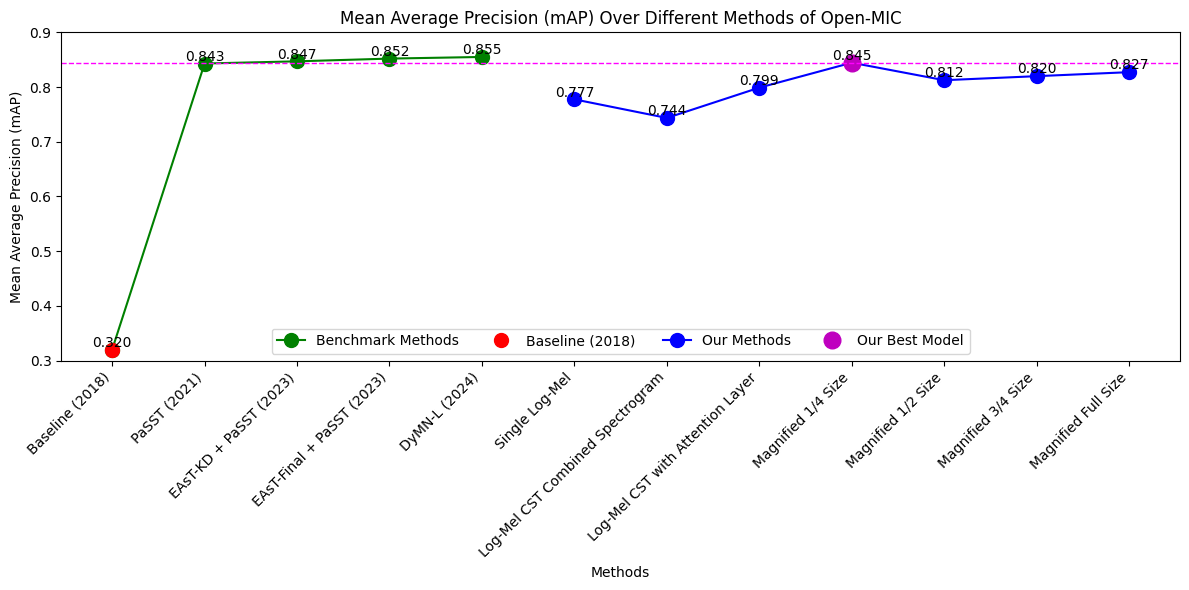

In [22]:
import matplotlib.pyplot as plt

# Data
x_labels = ["Baseline (2018)",
            "PaSST (2021)", "EAsT-KD + PaSST (2023)",
            "EAsT-Final + PaSST (2023)",
            "DyMN-L (2024)",
            "Single Log-Mel",
            "Log-Mel CST Combined Spectrogram",
            "Log-Mel CST with Attention Layer",
            "Magnified 1/4 Size",
            "Magnified 1/2 Size",
            "Magnified 3/4 Size",
            "Magnified Full Size"
            ]
y_values = [0.32,
            0.843,
            0.847,
            0.852,
            0.855,
            0.7775,
            0.7435,
            0.7989,
            0.8445,
            0.8125,
            0.8199,
            0.8272,
            ]

# Plot
plt.figure(figsize=(12, 6))

# Plot benchmark methods
plt.plot(x_labels[:5], y_values[:5], 'go-', label="Benchmark Methods", markersize=10)
plt.plot(x_labels[0], y_values[0], 'ro', markersize=10, label="Baseline (2018)")  # Baseline in red

# Plot our methods
plt.plot(x_labels[5:], y_values[5:], 'bo-', label="Our Methods", markersize=10)  # Our methods in blue

# Emphasize Magnified 1/4 Size
highlight_index = x_labels.index("Magnified 1/4 Size")
plt.plot(x_labels[highlight_index], y_values[highlight_index], 'mo', markersize=12, label="Our Best Model")

# Add a horizontal line at the y-value of Magnified 1/4 Size
plt.axhline(y=y_values[highlight_index], color='magenta', linestyle='--', linewidth=1)

# Titles and labels
plt.title("Mean Average Precision (mAP) Over Different Methods of Open-MIC")
plt.xlabel("Methods")
plt.ylabel("Mean Average Precision (mAP)")
plt.ylim(0.3, 0.9)

# Add data labels
for i, value in enumerate(y_values):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

# Remove grid
plt.grid(False)
plt.tight_layout()

# Show plot
plt.show()
